# Sales Analysis of a Supermarket using Python

## Import Libaries

In [6]:
import numpy as np
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

### Loading the dataset into a dataframe

In [71]:
df = pd.read_excel('superstore_sales.xlsx')

In [72]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


#### Checking for the details about the columns and the null values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
df.shape # toal number of rows and columns

(51290, 21)

In [8]:
df.columns #total 21 columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
df.isna().sum() # detect the missing value
#Replace all NOT A NUMBER values in the DataFrame with True otherwise false

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

#### A quick glimpse of some basic statistical details of the dataframe

In [8]:
df.describe().round()


,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


In [24]:
### A quick glance at the number of transactions with losses in each category

In [23]:
df['category'].astype("category") # checking the types of the products

0        Office Supplies
1        Office Supplies
2        Office Supplies
3        Office Supplies
4              Furniture
              ...       
51285    Office Supplies
51286    Office Supplies
51287    Office Supplies
51288    Office Supplies
51289    Office Supplies
Name: category, Length: 51290, dtype: category
Categories (3, object): [Furniture, Office Supplies, Technology]

In [9]:
df[df['profit'] < 0].category.value_counts() #calculating based on category

Office Supplies    7003
Furniture          3116
Technology         2424
Name: category, dtype: int64

#### Creating a new column of month named year_month from the order_date column

In [34]:
df['year_month'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [11]:
df


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12


### Monthly sales from 2011–2014

In [36]:
df2011 = df.loc[df['year'] == 2011] 
df2011_monthly_sales = df2011.groupby('year_month')['sales'].sum().reset_index()
df2011_monthly_sales

,year_month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


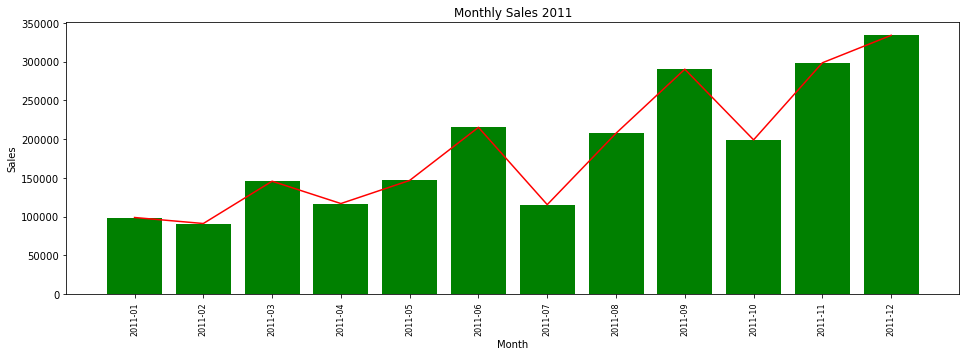

In [13]:
plt.figure(figsize=(16,5))
plt.plot(df2011_monthly_sales['year_month'], df2011_monthly_sales['sales'], color='red')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales 2011')
plt.bar(df2011_monthly_sales['year_month'], df2011_monthly_sales['sales'], color='green')
plt.show()

In [14]:
df2012 = df.loc[df['year'] == 2012]
df2012_monthly_sales = df2012.groupby('year_month')['sales'].sum().reset_index()
df2012_monthly_sales

,year_month,sales
0,2012-01,135780.72024
1,2012-02,100510.21698
2,2012-03,163076.77116
3,2012-04,161052.26952
4,2012-05,208364.89124
5,2012-06,256175.69842
6,2012-07,145236.78512
7,2012-08,303142.94238
8,2012-09,289389.16564
9,2012-10,252939.85020


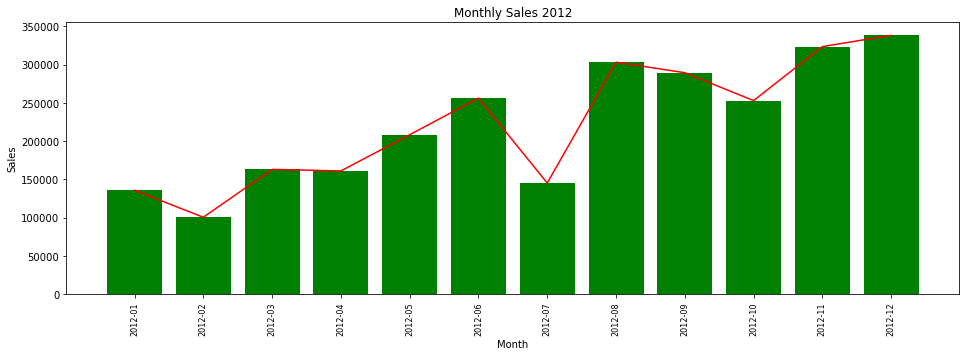

In [16]:
plt.figure(figsize=(16,5))
plt.plot(df2012_monthly_sales['year_month'], df2012_monthly_sales['sales'], color='red')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales 2012')
plt.bar(df2012_monthly_sales['year_month'], df2012_monthly_sales['sales'], color='green')
plt.show()

In [17]:
df2013 = df.loc[df['year'] == 2013]
df2013_monthly_sales = df2013.groupby('year_month')['sales'].sum().reset_index()
df2013_monthly_sales

,year_month,sales
0,2013-01,199185.90738
1,2013-02,167239.65040
2,2013-03,198594.03012
3,2013-04,177821.31684
4,2013-05,260498.56470
5,2013-06,396519.61190
6,2013-07,229928.95200
7,2013-08,326488.78936
8,2013-09,376619.24568
9,2013-10,293406.64288


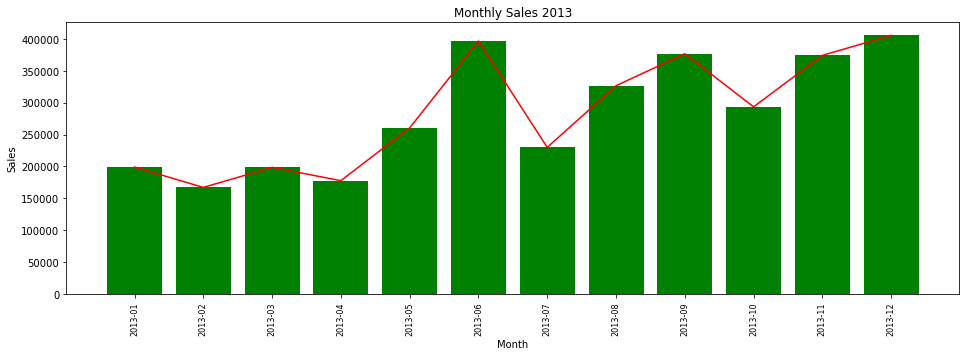

In [18]:
plt.figure(figsize=(16,5))
plt.plot(df2013_monthly_sales['year_month'], df2013_monthly_sales['sales'], color='red')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales 2013')
plt.bar(df2013_monthly_sales['year_month'], df2013_monthly_sales['sales'], color='green')
plt.show()

In [19]:
df2014 = df.loc[df['year'] == 2014]
df2014_monthly_sales = df2014.groupby('year_month')['sales'].sum().reset_index()
df2014_monthly_sales

,year_month,sales
0,2014-01,241268.55566
1,2014-02,184837.35556
2,2014-03,263100.77262
3,2014-04,242771.86130
4,2014-05,288401.04614
5,2014-06,401814.06310
6,2014-07,258705.68048
7,2014-08,456619.94236
8,2014-09,481157.24370
9,2014-10,422766.62916


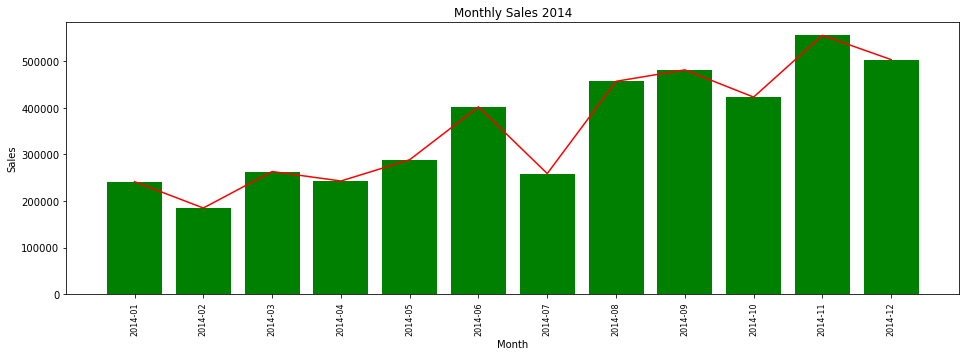

In [20]:
plt.figure(figsize=(16,5))
plt.plot(df2014_monthly_sales['year_month'], df2014_monthly_sales['sales'], color='red')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales 2014')
plt.bar(df2014_monthly_sales['year_month'], df2014_monthly_sales['sales'], color='green')
plt.show()

##### Monthly sales yearly from 2011 to 2014

In [21]:
df_monthly_sales = df.groupby('year_month')['sales'].sum().reset_index()
df_monthly_sales


,year_month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


#### Plot showing the monthly trend of sales yearly.

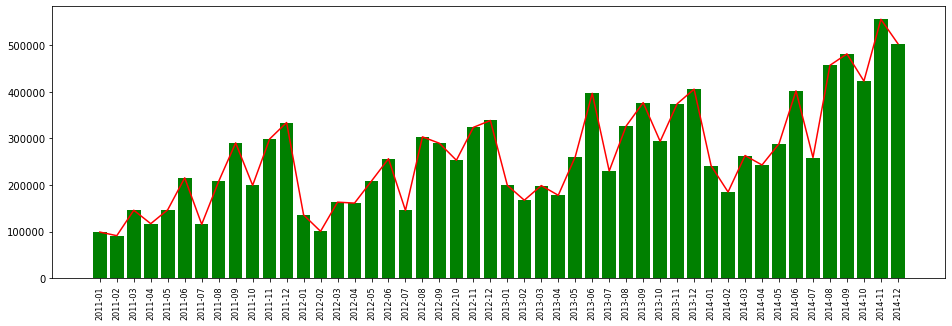

In [22]:
plt.figure(figsize=(16,5))
plt.plot(df_monthly_sales['year_month'], df_monthly_sales['sales'], color='red')
plt.xticks(rotation='vertical', size=8)
plt.bar(df_monthly_sales['year_month'], df_monthly_sales['sales'], color='green')
plt.show()

#### Categorizing by product_name along with most sales

In [45]:
sales_by_product  = (df.groupby('product_name'))['sales'].sum().reset_index()
sales_by_product.sort_values(by='sales', ascending=False)

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...,...
438,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.7000
1641,Grip Seal Envelopes,7.0720
3707,Xerox 20,6.4800
373,Avery 5,5.7600


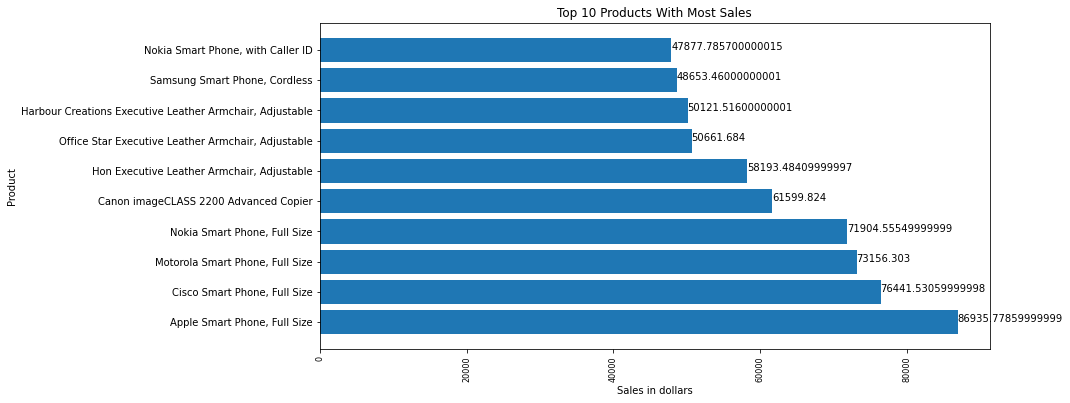

In [24]:
plt.figure(figsize=(12,6))
plt.barh(sales_by_product[:10]['product_name'], sales_by_product[:10]['sales'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Sales in dollars')
plt.ylabel('Product')
plt.title('Top 10 Products With Most Sales')
for index, value in enumerate(sales_by_product[:10]['sales']):
    plt.text(value, index,
             str(value))
plt.show()

#### Categorizing  by quantity and along with the product's most sales

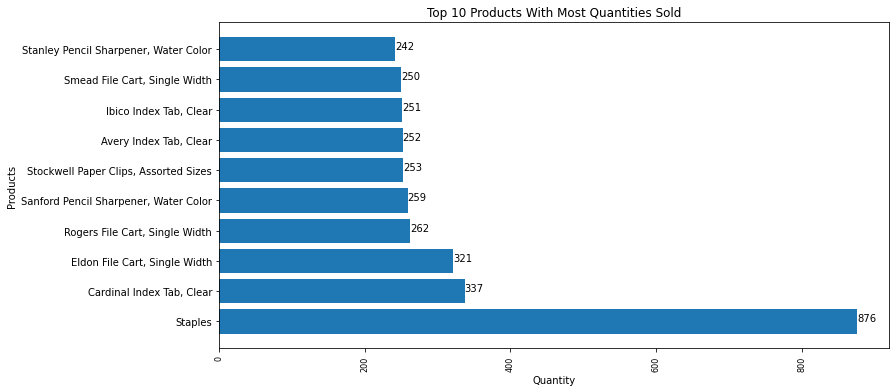

In [25]:
quantity_by_product = grp_product['quantity'].sum().reset_index()
quantity_by_product = quantity_by_product.sort_values(by='quantity', ascending=False)
quantity_by_product[:10]
plt.figure(figsize=(12,6))
plt.barh(quantity_by_product[:10]['product_name'], quantity_by_product[:10]['quantity'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Quantity')
plt.ylabel('Products')
plt.title('Top 10 Products With Most Quantities Sold')
for index, value in enumerate(quantity_by_product[:10]['quantity']):
    plt.text(value, index,
             str(value))
plt.show()

#### Total sales for each category

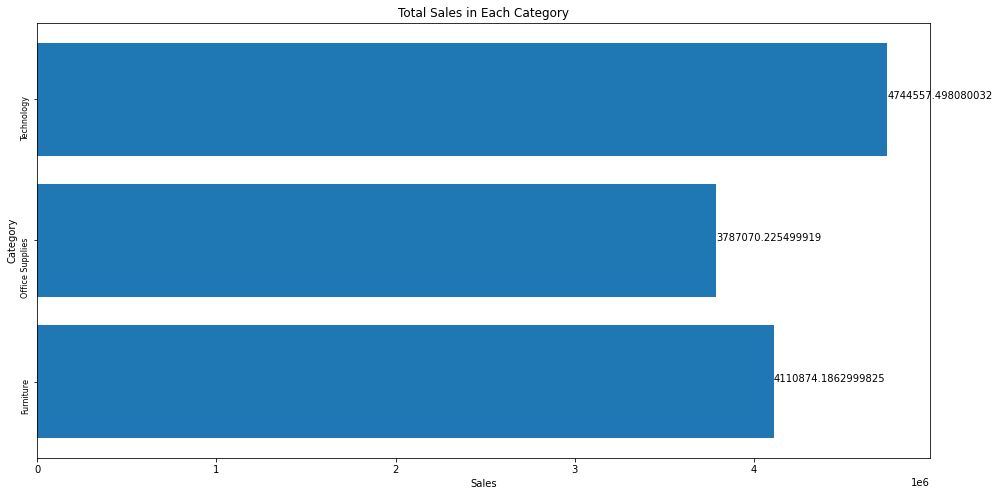

In [50]:
df_category_sales = df.groupby('category')['sales'].sum().reset_index()
df_category_sales.sort_values(by='sales', ascending=False)
plt.figure(figsize=(16,8))
plt.barh(df_category_sales[:10]['category'], df_category_sales[:10]['sales'])
plt.yticks(rotation='vertical', size=8)
plt.xlabel('Sales')
plt.ylabel('Category')
plt.title('Total Sales in Each Category')
for index, value in enumerate(df_category_sales['sales']):
    plt.text(value, index,
             str(value))
plt.show()

#### Sales profit by the three categories

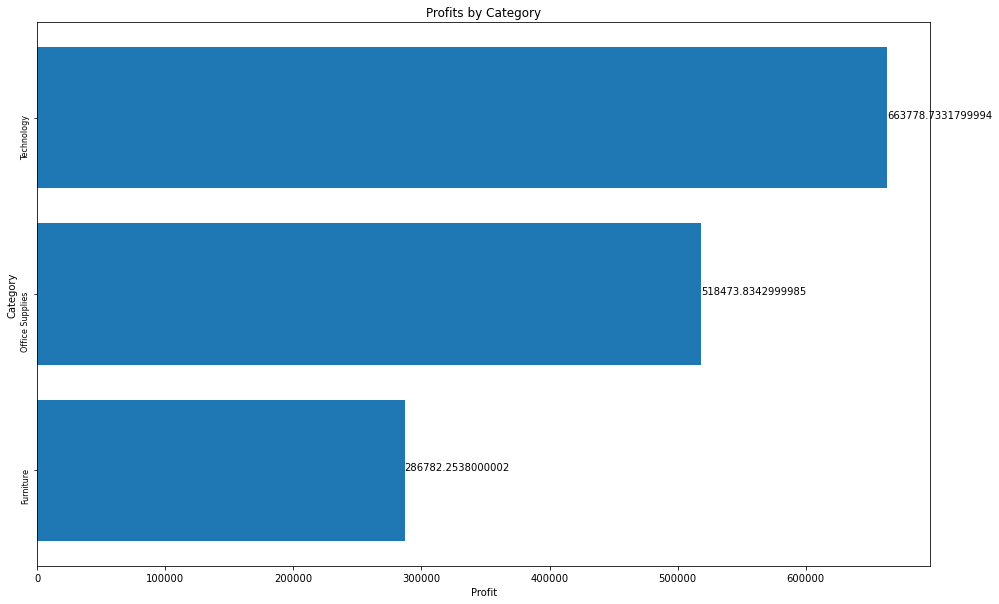

In [55]:
df_category_profit = df.groupby('category')['profit'].sum().reset_index()
df_category_profit.sort_values(by='profit', ascending=False)
plt.figure(figsize=(16,10))
plt.barh(df_category_profit[:10]['category'], df_category_profit[:10]['profit'])
plt.yticks(rotation='vertical', size=8)
plt.xlabel('Profit')
plt.ylabel('Category')
plt.title('Profits by Category')
for index, value in enumerate(df_category_profit['profit']):
    plt.text(value, index,
             str(value))
plt.show()

#### Sales in Each Category based on quantities

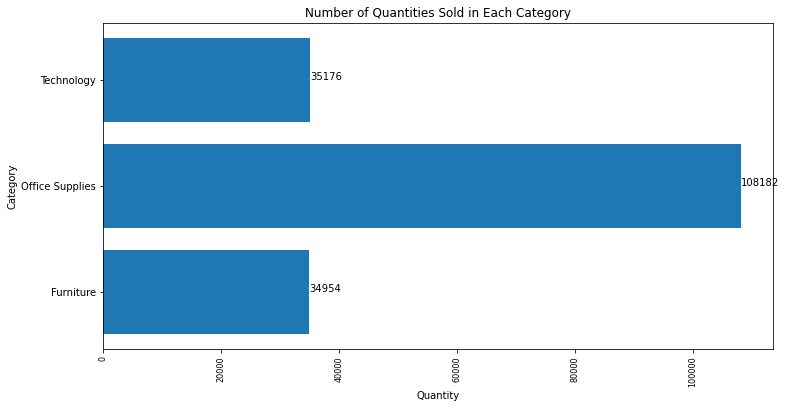

In [49]:
df_category_quantity = df.groupby('category')['quantity'].sum().reset_index()
df_category_quantity.sort_values(by='quantity', ascending=False)
plt.figure(figsize=(12,6))
plt.barh(df_category_quantity[:10]['category'], df_category_quantity[:10]['quantity'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Quantity')
plt.ylabel('Category')
plt.title('Number of Quantities Sold in Each Category')
for index, value in enumerate(df_category_quantity[:10]['quantity']):
    plt.text(value, index,
             str(value))
plt.show()

#### Sales profit for the sub-categories 

In [52]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
sub_cat_sales = cat_subcat.sort_values(['category','profit'], ascending=False)
sub_cat_sales

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

#### Numbers of Products Sold by Sub-category

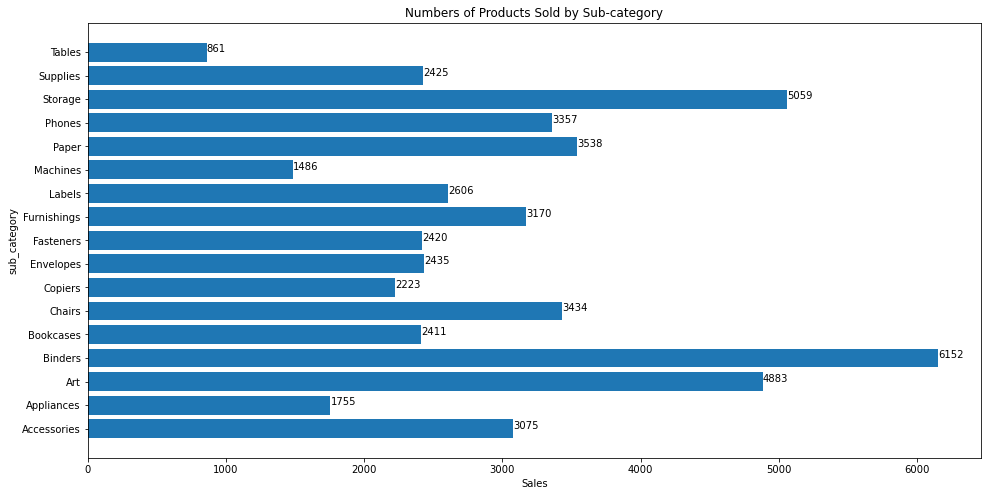

In [90]:
subcat= df.groupby('sub_category')['sales'].count().reset_index()
subcat
subcat.sort_values(by='sales', ascending=False)
plt.figure(figsize=(16,8))
plt.barh(subcat['sub_category'], subcat['sales'])
plt.yticks(rotation='horizontal', size=10)
plt.xlabel('Sales')
plt.ylabel('sub_category')
plt.title('Numbers of Products Sold by Sub-category')
for index, value in enumerate(subcat['sales']):
    plt.text(value, index,
             str(value))
plt.show()

In [59]:
df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


#### Top 10 countries With Highest Sales

In [108]:
country_count= df['country'].value_counts()
country_count = country_count.sort_values(ascending = False)
country_count.head(10)

United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: country, dtype: int64

#### Top 10 Countries by Amount of Sales

In [111]:
country_sales= df.groupby(df['country']).sum()['sales'].reset_index()
country_sales = country_sales.sort_values('sales', ascending = False)
country_sales.head(10)

,country,sales
139,United States,2.297201e+06
6,Australia,9.252359e+05
44,France,8.589311e+05
26,China,7.005620e+05
47,Germany,6.288400e+05
81,Mexico,6.225906e+05
57,India,5.896501e+05
138,United Kingdom,5.285763e+05
58,Indonesia,4.048875e+05
17,Brazil,3.611064e+05


#### Top 10 Countries by Amount of profit

In [115]:
country_profit= df.groupby(df['country']).sum()['profit'].reset_index()
country_profit = country_profit.sort_values('profit', ascending = False)
country_profit.head(10)

,country,profit
139,United States,286397.02170
26,China,150683.08500
57,India,129071.83500
138,United Kingdom,111900.15000
44,France,109029.00300
47,Germany,107322.82050
6,Australia,105484.96300
81,Mexico,102818.09752
119,Spain,54390.12000
38,El Salvador,42023.24320


#### Total number of transactions per customer

In [68]:
transaction =df.customer_name.value_counts()[:10]
transaction


Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Bill Eplett        102
Patrick O'Brill    102
Harry Greene       101
Eric Murdock       100
Art Ferguson        98
Brosina Hoffman     97
Bart Watters        96
Name: customer_name, dtype: int64

 #### The customer with most transactions completed

In [39]:
df[df['customer_name'] == 'Muhammed Yedwab'].region.value_counts()

Central           33
Africa            13
North Asia        12
North             12
EMEA              10
East               9
Oceania            8
Southeast Asia     4
Caribbean          4
South              2
West               1
Name: region, dtype: int64

#### Checking the customers with the highest amount of sales

In [40]:
df_customer_sales = df.groupby('customer_name')['sales'].sum().reset_index()
df_customer_sales.sort_values(by='sales', ascending=False)[:10][['customer_name', 'sales']]

,customer_name,sales
758,Tom Ashbrook,40488.07080
731,Tamara Chand,37457.33300
313,Greg Tran,35550.95428
157,Christopher Conant,35187.07640
687,Sean Miller,35170.93296
73,Bart Watters,32310.44650
558,Natalie Fritzler,31781.25850
290,Fred Hopkins,30400.67452
347,Jane Waco,30288.45030
335,Hunter Lopez,30243.56658


#### Checking for correlation amongst the numeric columns

In [41]:
superstore_corr = df.corr()
superstore_corr

,sales,quantity,discount,profit,shipping_cost,year
sales,1.000000,0.313577,-0.086722,0.485939,0.768073,-0.002905
quantity,0.313577,1.000000,-0.019875,0.104743,0.272649,-0.005049
discount,-0.086722,-0.019875,1.000000,-0.316375,-0.079055,-0.005894
profit,0.485939,0.104743,-0.316375,1.000000,0.357033,0.002661
shipping_cost,0.768073,0.272649,-0.079055,0.357033,1.000000,-0.003137
year,-0.002905,-0.005049,-0.005894,0.002661,-0.003137,1.000000


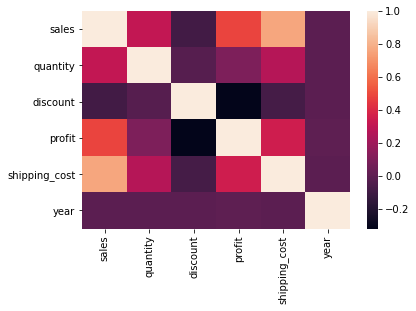

In [42]:
sns.heatmap(superstore_corr)

#### Total sales trend yearly


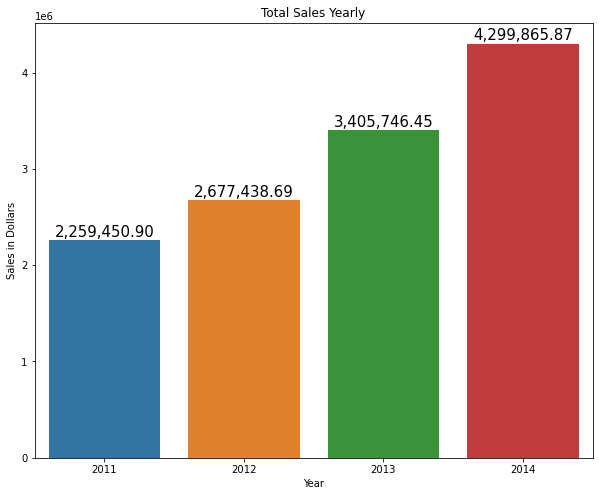

In [43]:
df_year_sales = df.groupby('year')['sales'].sum().reset_index()
df_year_sales.sort_values(by='sales', ascending=False)

plt.figure(figsize=(10,8))
plt.title('Total Sales Yearly')
plots = sns.barplot(x='year', y='sales', data=df_year_sales)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), ',.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel('Sales in Dollars')
plt.xlabel('Year')
plt.show()

#### Total transactions yearly trend

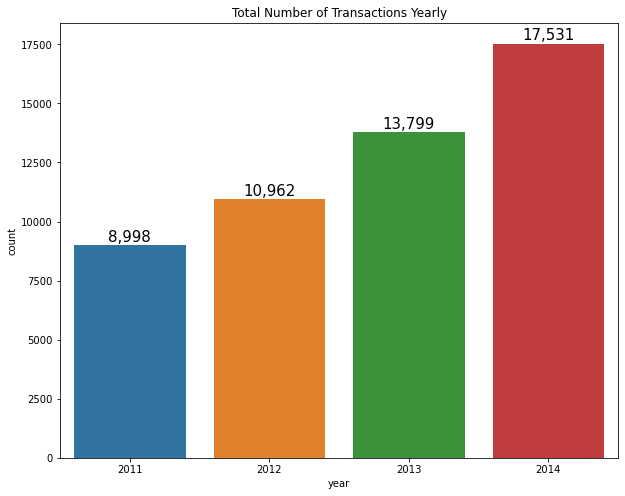

In [44]:
plt.figure(figsize=(10,8))
plt.title('Total Number of Transactions Yearly')
plt.ylabel('Number of sales')

plots = sns.countplot(x='year', data=df)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), ',.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

#### Frequency of each Shipping Mode

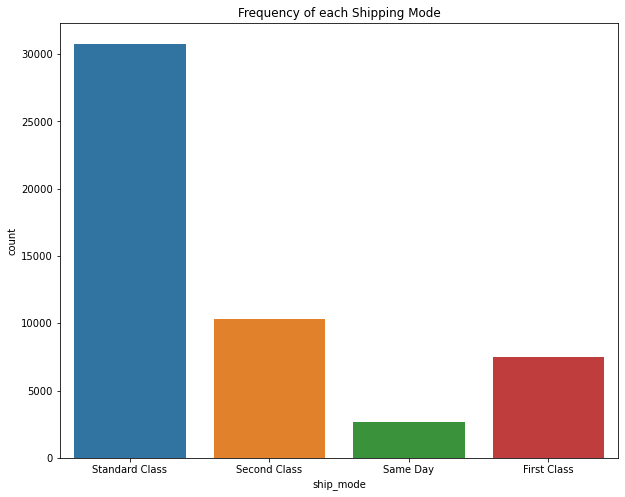

In [48]:
plt.figure(figsize=(10,8))
plt.title('Frequency of each Shipping Mode')
sns.countplot(x='ship_mode', data=df)
plt.show()